In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # KNN Method
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [591]:
heart=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [592]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [593]:
heart.shape

(316, 13)

In [594]:
#data processing
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [595]:
heart.isnull().sum() ##No null values in our dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [596]:
#####    EDA

In [597]:
heart.corr()  ##corelation matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.085699,-0.083643,-0.098252,0.059285,0.080669,-0.041324,0.137502,-0.032837,0.077971,0.017124,-0.221420,0.231169
anaemia,0.085699,1.000000,-0.198034,0.002461,0.049135,0.041528,-0.033984,0.064815,0.044417,-0.089333,-0.096717,-0.136262,0.058235
creatinine_phosphokinase,-0.083643,-0.198034,1.000000,-0.014512,-0.046123,-0.074296,0.038454,-0.019381,0.073130,0.073361,0.000859,-0.006245,0.055943
diabetes,-0.098252,0.002461,-0.014512,1.000000,-0.023045,-0.020675,0.101201,-0.059424,-0.087345,-0.148850,-0.134820,0.025217,-0.002711
ejection_fraction,0.059285,0.049135,-0.046123,-0.023045,1.000000,0.049862,0.070730,0.038716,0.183652,-0.170709,-0.073197,0.017049,-0.287973
high_blood_pressure,0.080669,0.041528,-0.074296,-0.020675,0.049862,1.000000,0.043540,0.028615,0.031116,-0.112598,-0.064323,-0.197952,0.055868
platelets,-0.041324,-0.033984,0.038454,0.101201,0.070730,0.043540,1.000000,-0.066101,0.088083,-0.112614,0.036920,-0.004053,-0.076870
serum_creatinine,0.137502,0.064815,-0.019381,-0.059424,0.038716,0.028615,-0.066101,1.000000,-0.166895,-0.019915,-0.047555,-0.111452,0.296377
serum_sodium,-0.032837,0.044417,0.073130,-0.087345,0.183652,0.031116,0.088083,-0.166895,1.000000,-0.021188,0.010202,0.066682,-0.201252
sex,0.077971,-0.089333,0.073361,-0.148850,-0.170709,-0.112598,-0.112614,-0.019915,-0.021188,1.000000,0.440072,-0.012363,0.004649


In [598]:
heart.corr()["DEATH_EVENT"]

age                         0.231169
anaemia                     0.058235
creatinine_phosphokinase    0.055943
diabetes                   -0.002711
ejection_fraction          -0.287973
high_blood_pressure         0.055868
platelets                  -0.076870
serum_creatinine            0.296377
serum_sodium               -0.201252
sex                         0.004649
smoking                    -0.024978
time                       -0.440505
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

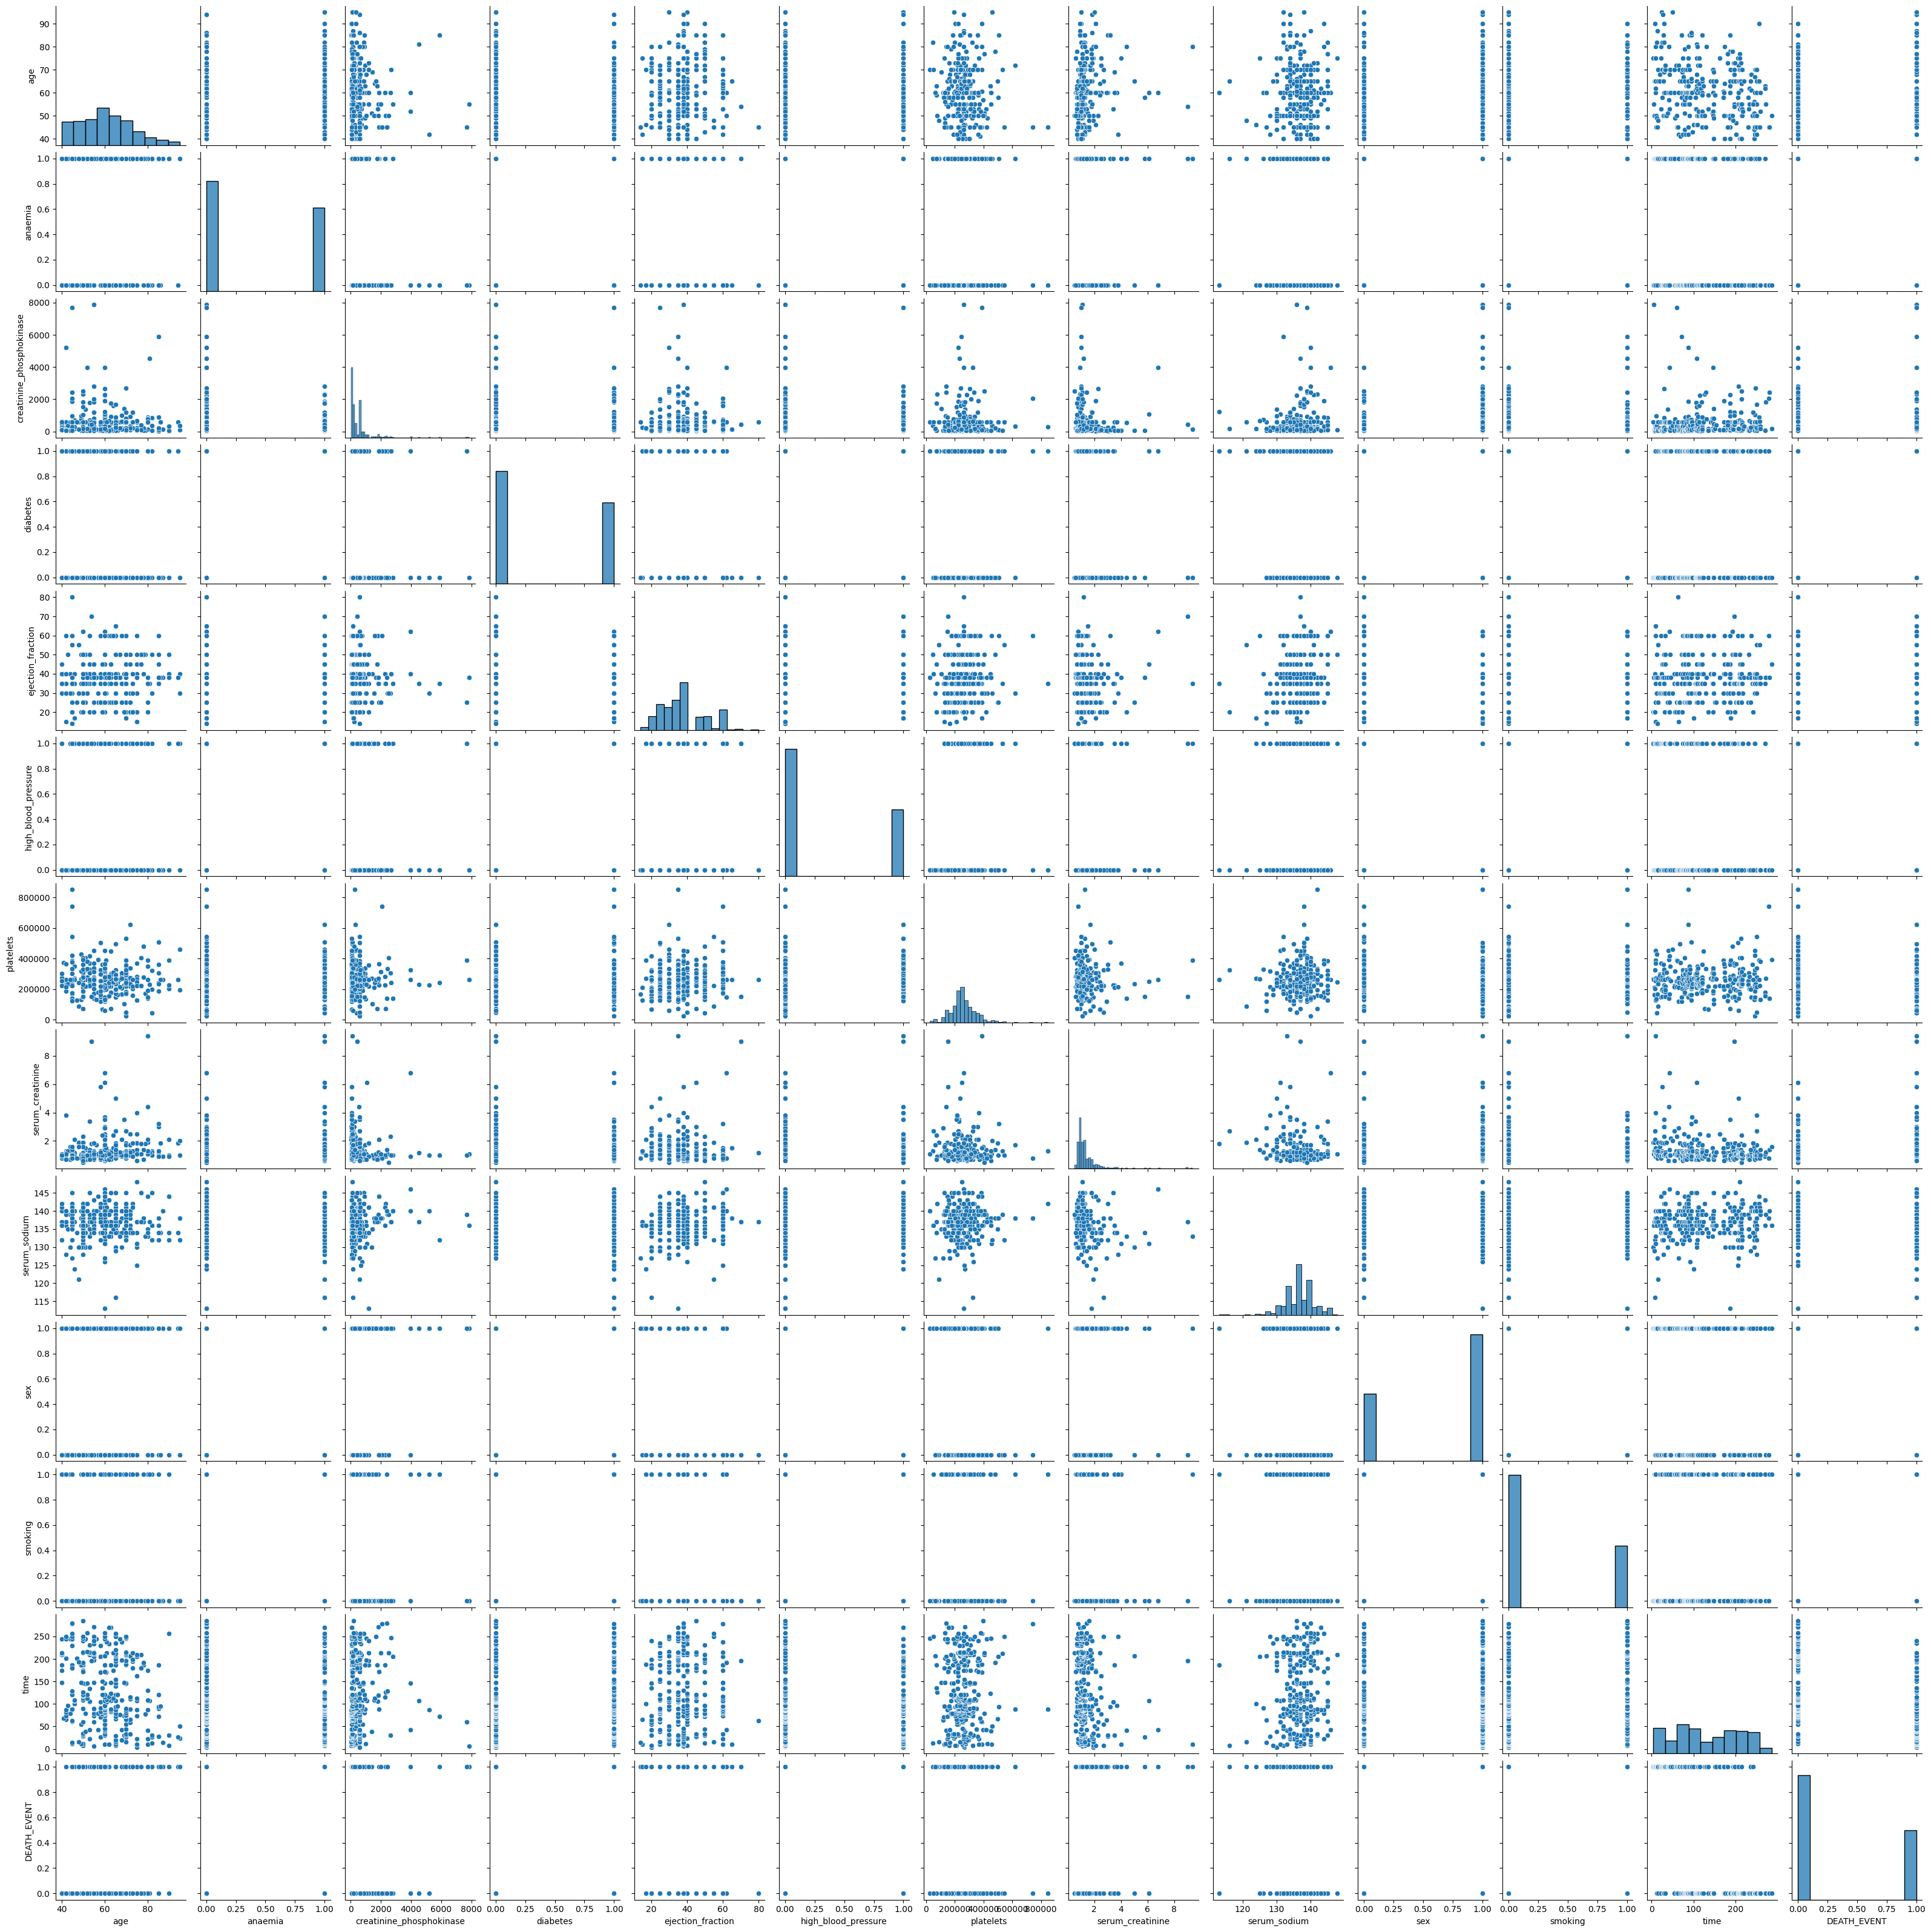

In [599]:
# pair plot
sns.pairplot(heart)

<Axes: >

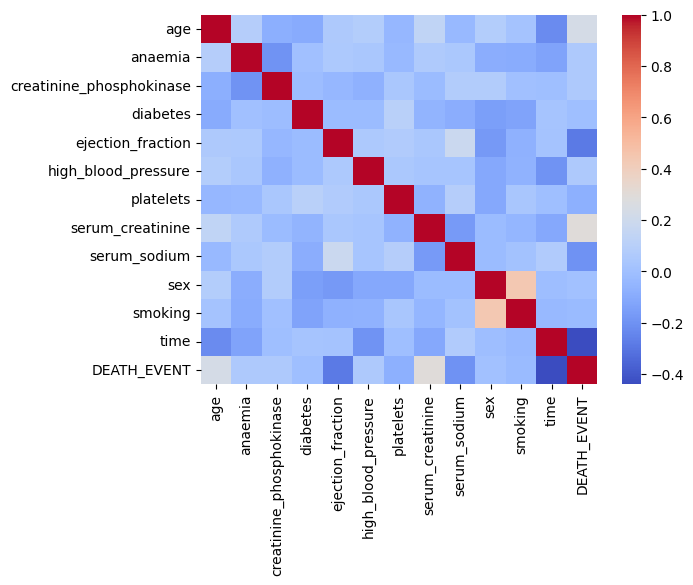

In [600]:
sns.heatmap(heart.corr(),cmap='coolwarm')   #highest co-relation between age and target(DEATH_EVENT)

<Axes: >

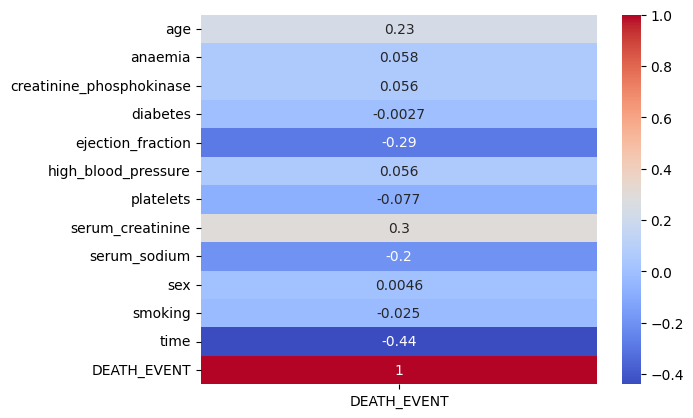

In [601]:
sns.heatmap(heart.corr()[["DEATH_EVENT"]],annot = True , cmap='coolwarm')

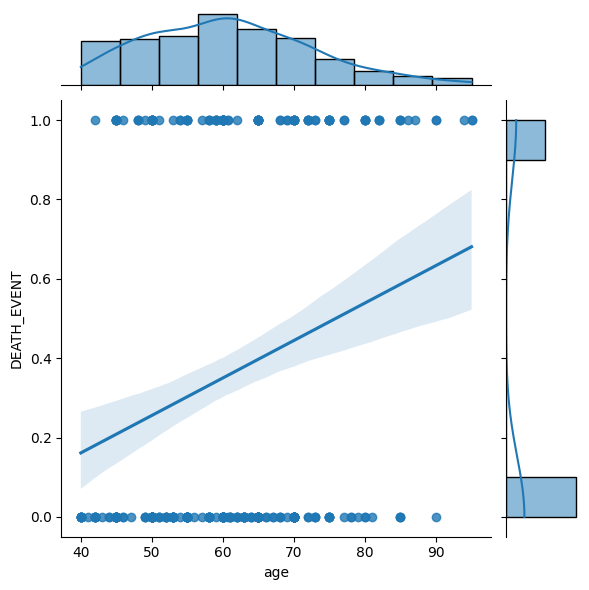

In [602]:
sns.jointplot(x="age",y="DEATH_EVENT",data=heart,kind="reg")

In [603]:
heart.DEATH_EVENT.value_counts()  ### our outcome is showing outof 316 sample 203 people are not dead(0), and 113 people are heartfailures dead (1).

0    203
1    113
Name: DEATH_EVENT, dtype: int64

In [604]:
113/203

0.5566502463054187

<Axes: >

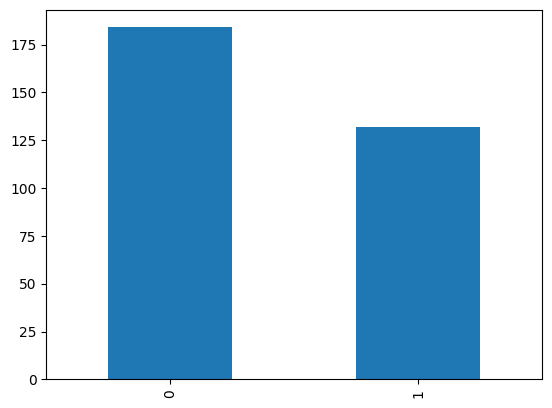

In [605]:
heart.diabetes.value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

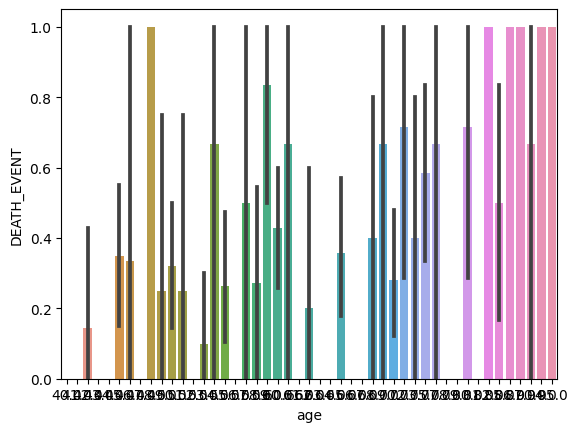

In [606]:
sns.barplot(x="age",y="DEATH_EVENT",data=heart)

<Axes: >

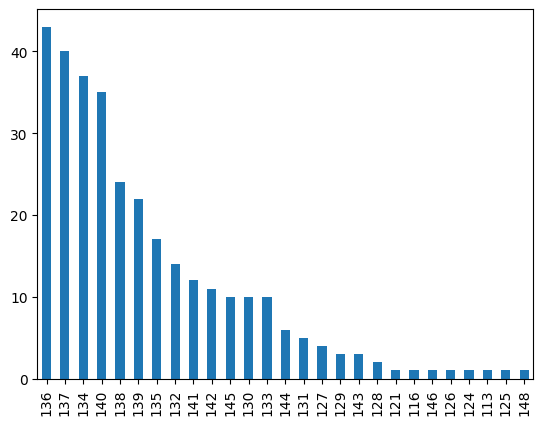

In [607]:
heart.serum_sodium.value_counts().plot(kind='bar')

<Axes: xlabel='time', ylabel='DEATH_EVENT'>

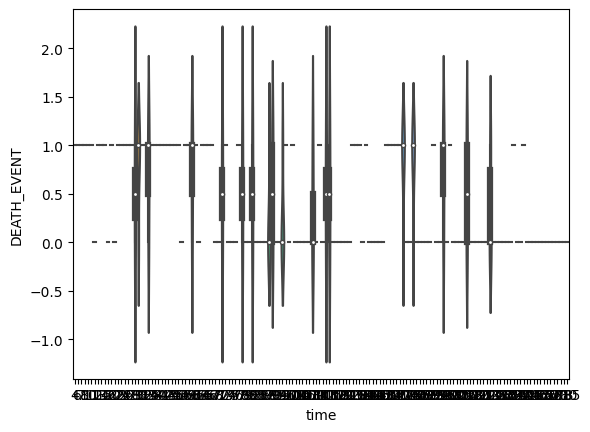

In [608]:
sns.violinplot(x="time",y="DEATH_EVENT",data=heart,palete="rainbow")

In [609]:
heart=heart=pd.get_dummies(heart,drop_first=True)
heart


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
312,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
313,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
314,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [610]:
# A binary 0/1 variable indicating whether or not a heartfailure death, where 1 means dead and 0 means not dead.

In [611]:
# A bivariate analysis
#In our case we have two classes: 1=accepted and 0=rejected.
#we have descret output ,so we do here logistic regression fo classification.

In [612]:
#Fitting and making predictions with the logistic regression model.
#We can follow the same steps to build a logistic regression model that we follow to build a linear regression mode
#Define X & y
#Instantiate the model.
#Fit the model.
#Generate predictions.
#Evaluate model.

In [613]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [614]:
# create out x,y
X=heart[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","serum_creatinine","sex","smoking","time"]]
        # independent variable , matrix
y = heart["DEATH_EVENT"] # dependent variable,vector

In [615]:
# Step 1: Split into training & testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [616]:
logreg = LogisticRegression()# Step 2: Instantiate our model.

In [617]:
# Step 3: Fit our model.

logreg.fit(X_train,y_train)

LogisticRegression()

In [618]:
logreg.intercept_

array([0.0908046])

In [619]:
logreg.coef_

array([[ 4.01031115e-02,  2.32527539e-01,  2.37517372e-04,
         2.38236214e-01, -8.29751968e-02,  7.24252660e-02,
         1.00298666e+00, -1.04003574e-01, -5.01426635e-02,
        -1.53321049e-02]])

In [620]:
len(X_test)

95

In [621]:
len(X_train)

221

In [622]:
len(y_test)

95

In [623]:
len(y_train)

221

In [624]:
X.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
serum_creatinine            float64
sex                           int64
smoking                       int64
time                          int64
dtype: object>

In [625]:

X_train.dtypes.index

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'sex',
       'smoking', 'time'],
      dtype='object')

In [626]:
len(y_train)

221

In [627]:
y

0      1
1      1
2      1
3      1
4      1
      ..
311    1
312    1
313    1
314    1
315    1
Name: DEATH_EVENT, Length: 316, dtype: int64

In [628]:
y_train.value_counts()

0    142
1     79
Name: DEATH_EVENT, dtype: int64

In [629]:
90/162

0.5555555555555556

In [630]:
#######  There are two methods in sklearn to be aware of when using logistic regression:

#.predict()
#.predict_proba()

In [631]:
# Step 4 (part 1): Generate predicted values.

logreg.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0])

In [632]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(logreg.predict_proba(X_test),2)

array([[0.98, 0.02],
       [0.11, 0.89],
       [0.38, 0.62],
       [0.38, 0.62],
       [0.91, 0.09],
       [0.07, 0.93],
       [0.82, 0.18],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.98, 0.02],
       [0.37, 0.63],
       [0.29, 0.71],
       [0.91, 0.09],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.64, 0.36],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.68, 0.32],
       [0.36, 0.64],
       [0.36, 0.64],
       [0.9 , 0.1 ],
       [0.86, 0.14],
       [0.24, 0.76],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.81, 0.19],
       [0.8 , 0.2 ],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.12, 0.88],
       [0.75, 0.25],
       [0.58, 0.42],
       [0.68, 0.32],
       [0.93, 0.07],
       [0.85, 0.15],
       [0.92, 0.08],
       [0.22, 0.78],
       [0.87, 0.13],
       [0.7 , 0.3 ],
       [0.97, 0.03],
       [0.2 , 0.8 ],
       [0.86, 0.14],
       [0.59, 0.41],
       [0.07, 0.93],
       [0.47, 0.53],
       [0.91,

In [633]:
# Step 5: Evaluate model.

logreg.score(X_train,y_train)

0.8144796380090498

In [634]:
logreg.score(X_test,y_test)## the significance level is below 5 %
# Hence its. good fit model

0.7789473684210526

In [635]:
#prediction
predL=logreg.predict(X_test)

In [636]:
cm = confusion_matrix(y_test,predL)

In [637]:
tn, fp, fn , tp = confusion_matrix(y_test,predL).ravel()

In [638]:
cm

array([[53,  8],
       [13, 21]])

In [639]:
fp

8

In [640]:
fn

13

In [641]:
tp

21

In [642]:
tn

53

In [643]:
cm_log = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

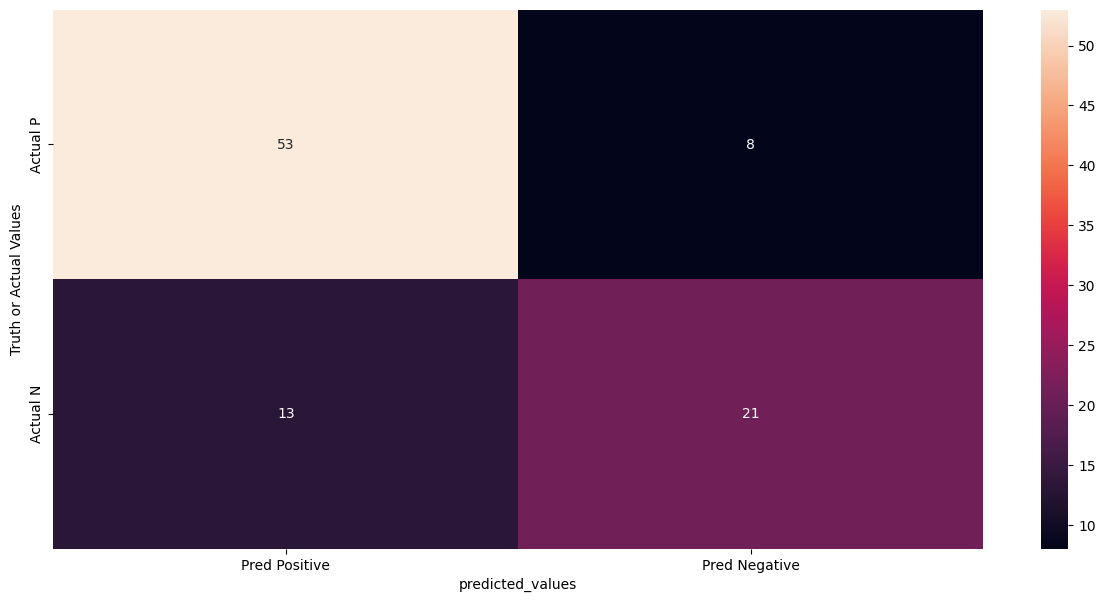

In [644]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_log,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [645]:
cm_log.head()

,Pred Positive,Pred Negative
Actual P,53,8
Actual N,13,21


In [646]:
(37+13)/(37+10+4+13)

0.78125

In [647]:
print(classification_report(y_test,predL))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        61
           1       0.72      0.62      0.67        34

    accuracy                           0.78        95
   macro avg       0.76      0.74      0.75        95
weighted avg       0.77      0.78      0.77        95



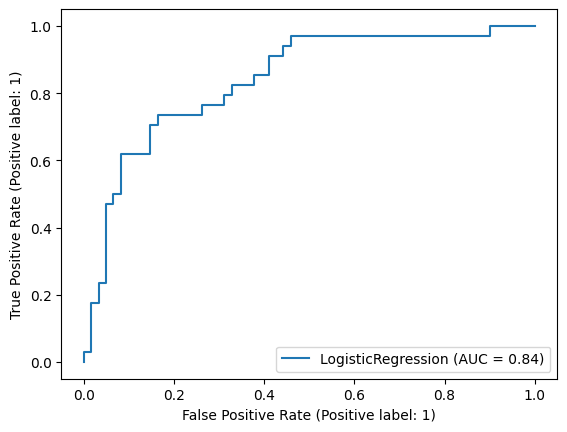

In [648]:
#Auc_curve
from sklearn.metrics import RocCurveDisplay
logreg_disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

#KNN

In [649]:
# model instantied
knn = KNeighborsClassifier()

In [650]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [651]:
knn.score(X_train,y_train)

0.8235294117647058

In [652]:
knn.score(X_test,y_test)

0.7368421052631579

In [653]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,9):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [654]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.6928427419354839

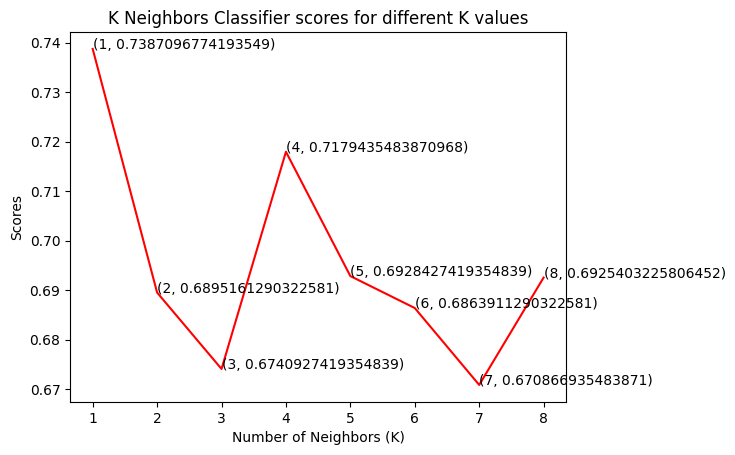

In [655]:
plt.plot([k for k in range(1, 9)], knn_scores, color = 'red')
for i in range(1,9):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 9)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [656]:
#prediction
pred = knn.predict(X_test)

In [657]:
#Confusion Matrix
#We'll create a confusion matrix using the confusion_matrix function from sklearn's metrics module.
from sklearn.metrics import confusion_matrix

In [658]:
cm = confusion_matrix(y_test,pred)

In [659]:
tn, fp, fn , tp = confusion_matrix(y_test,pred).ravel()

In [660]:
cm

array([[54,  7],
       [18, 16]])

In [661]:
tn

54

In [662]:
!pip install --upgrade scikit-learn

In [663]:
#Confusion DataFrame
#The confusion matrix we just created isn't very explanatory, so let's drop it into a pandas DataFrame.
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

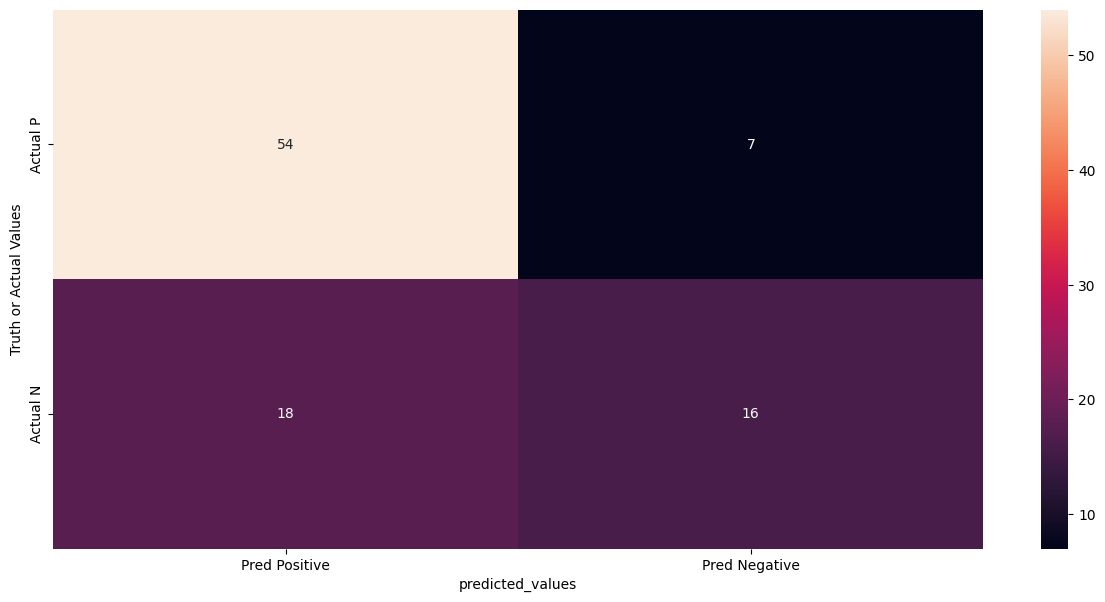

In [664]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_df,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [665]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,54,7
Actual N,18,16


In [666]:
(37+11)/(37+12+4+11)

0.75

In [667]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        61
           1       0.70      0.47      0.56        34

    accuracy                           0.74        95
   macro avg       0.72      0.68      0.69        95
weighted avg       0.73      0.74      0.72        95



In [668]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,recall_score,precision_score

In [669]:
recall_score(y_test,pred)

0.47058823529411764

In [670]:
precision_score(y_test,pred)

0.6956521739130435

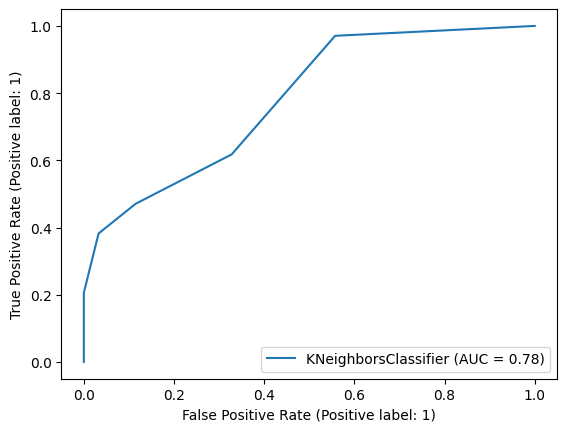

In [671]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


In [672]:
# Final score of our all algorithms,Highest one of the
print("knn:",accuracy_score(y_test,pred))
print("logisticregression:",accuracy_score(y_test,predL))

knn: 0.7368421052631579
logisticregression: 0.7789473684210526
